In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('telecom_imputed.csv')
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,last_rech_6,last_rech_7,last_rech_8
0,0.0,109.0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,...,0.0,0.0,1958.0,0.0,0.0,0.0,0.0,22.0,9.0,54.0
1,1.0,109.0,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,...,0.0,0.0,710.0,0.0,0.0,0.0,0.0,12.0,9.0,56.0
2,2.0,109.0,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,...,0.0,0.0,882.0,0.0,0.0,0.0,0.0,11.0,21.0,54.0
3,3.0,109.0,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,...,0.0,0.0,982.0,0.0,0.0,0.0,0.0,15.0,20.0,55.0
4,4.0,109.0,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,...,1.0,0.0,647.0,0.0,0.0,0.0,0.0,25.0,25.0,60.0


In [3]:
## Actual Data 
data = pd.read_csv('train.csv')
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
data.isnull().sum().sum()

1835086

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, BatchNormalization, Dropout
from keras.models import Sequential
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
from keras.optimizers import Adadelta, RMSprop, SGD, Adam, Adagrad

In [6]:
y = df['churn_probability'].astype(int)
X = df.drop('churn_probability', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,last_rech_6,last_rech_7,last_rech_8
47338,47338.0,109.0,0.0,0.0,0.0,172.250,149.720,244.222,20.71,13.16,...,0.0,0.0,0.0,395.0,0.0,0.0,0.0,27.0,24.0,36.0
67455,67455.0,109.0,0.0,0.0,0.0,155.610,53.934,47.532,11.84,7.54,...,0.0,0.0,0.0,515.0,0.0,0.0,0.0,30.0,20.0,58.0
12308,12308.0,109.0,0.0,0.0,0.0,68.285,71.308,35.515,12.64,5.63,...,0.0,0.0,0.0,595.0,0.0,0.0,0.0,29.0,28.0,40.0
52334,52334.0,109.0,0.0,0.0,0.0,139.165,205.666,172.807,68.78,207.41,...,0.0,0.0,0.0,656.0,0.0,0.0,0.0,29.0,22.0,54.0
664,664.0,109.0,0.0,0.0,0.0,475.536,137.251,0.000,25.26,11.58,...,0.0,0.0,0.0,499.0,0.0,0.0,0.0,29.0,15.0,49.0


In [7]:
X_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,last_rech_6,last_rech_7,last_rech_8
57621,57621.0,109.0,0.0,0.0,0.0,1127.020,1363.096,421.153,365.19,402.24,...,0.0,0.0,0.0,669.0,0.00,0.00,0.00,29.0,30.0,59.0
39559,39559.0,109.0,0.0,0.0,0.0,517.241,407.339,426.689,112.28,126.01,...,0.0,0.0,0.0,464.0,107.79,916.29,1235.71,30.0,30.0,60.0
41415,41415.0,109.0,0.0,0.0,0.0,648.204,586.811,618.653,777.76,766.84,...,0.0,0.0,0.0,405.0,0.00,0.00,0.00,29.0,30.0,61.0
47731,47731.0,109.0,0.0,0.0,0.0,245.917,177.315,132.963,172.14,83.96,...,0.0,0.0,0.0,1240.0,0.00,0.00,0.00,29.0,29.0,61.0
64801,64801.0,109.0,0.0,0.0,0.0,891.619,765.631,920.688,475.13,419.36,...,0.0,0.0,0.0,1541.0,1239.80,496.45,271.36,29.0,28.0,61.0


In [8]:
from sklearn.decomposition import PCA

pca = Pipeline([
    ('scaler', StandardScaler()), ('pca', PCA())
])

X_pca = pca.fit_transform(X_train)

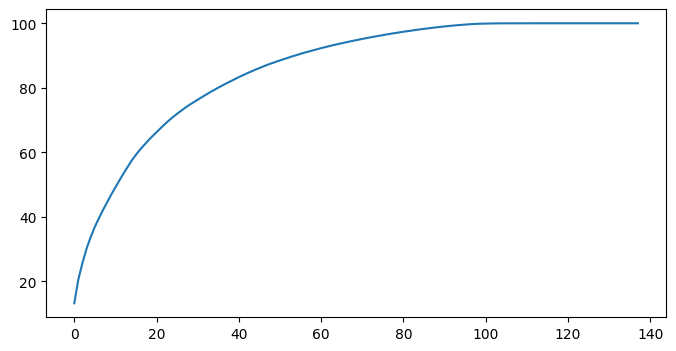

In [9]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
evr_df = pd.DataFrame(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100)

# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(8,4)) 
plt.plot(cumulative_variance)

In [10]:
evr_df.iloc[60:80]

,0
60,92.29
61,92.62
62,92.93
63,93.24
64,93.53
65,93.82
66,94.10
67,94.37
68,94.64
69,94.90


#### Selecting 70 principal components with 95% Variance Explainability

In [12]:
pca = Pipeline([
    ('scaler', StandardScaler()), ('pca', PCA(n_components=70))
])
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(55999, 70)
(14000, 70)


In [14]:
print(y_train.shape)
print(y_test.shape)

(55999,)
(14000,)


In [15]:
type(X_train_pca)

numpy.ndarray

In [16]:
history_saved = ""

## Modelling

In [18]:
def plot_performance(history):
    # Extract metrics from history
    history_saved = history
    epochs = np.arange(1, len(history.history['loss']) + 1)
    data = {
        'Epoch': epochs,
        'Training Loss': history.history['loss'],
        'Validation Loss': history.history['val_loss'],
        'Training Accuracy': history.history['accuracy'],
        'Validation Accuracy': history.history['val_accuracy']
    }
    
    df = pd.DataFrame(data)
    # Set Seaborn style
    sns.set(style="whitegrid")
    
    # Create a figure with subplots
    fig, axs = plt.subplots(1, 2, figsize=(10,5))

    plt.subplot(1,2,1)
    # Plot Training and Validation Loss
    sns.lineplot(x='Epoch', y='value', hue='variable', 
                 data=pd.melt(df[['Epoch', 'Training Loss', 'Validation Loss']], ['Epoch']))
    plt.title('Training and Validation Loss')

    plt.subplot(1,2,2)
    # Plot Training and Validation Accuracy
    sns.lineplot(x='Epoch', y='value', hue='variable', data=pd.melt(df[['Epoch', 'Training Accuracy', 'Validation Accuracy']], ['Epoch']))
    plt.title('Training and Validation Accuracy')
    
    # Adjust layout and show plot
    plt.tight_layout()


In [19]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support

def plot_auc_roc(y_test, y_pred):
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    # Compute AUC
    roc_auc = auc(fpr, tpr)
  
    print('ROC_AUC' ,roc_auc)
    print("AUC:    \t", round(roc_auc_score(y_test, y_pred),2))
    
    pfig, axs = plt.subplots(1, 2, figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05]) #to have some space for the line graph 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    
    
    # Compute Youden's J statistic
    youden_index = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[youden_index]
    
    print(f'Optimal Threshold: {optimal_threshold}')
    
    y_pred_thres = np.where((y_pred>=optimal_threshold), 1, 0)

    cm = confusion_matrix(y_test, y_pred_thres)
    cm_pt = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
    
    plt.subplot(1,2,2)
    sns.heatmap(cm_pt, annot=True, fmt='.2f', cmap='Blues', cbar=False)
    plt.show()

    print("Accuracy Score:\n", accuracy_score(y_test, y_pred_thres), end="\n\n")
    print("Recall Score:\n", recall_score(y_test, y_pred_thres), end="\n\n")
    print("Precision Score:\n", precision_score(y_test, y_pred_thres), end="\n\n")
    print("Classification Report:\n", classification_report(y_test, y_pred_thres), end="\n\n")

    # check sensitivity and specificity
    sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_thres, average='binary')
    print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
    
    print("\n\nConfusion Matrix:\n", cm, end="\n\n")
    

In [20]:
## Function to train a ANN Model
from sklearn.utils.class_weight import compute_class_weight
def train_model(model, X_train=X_train_pca, y_train=y_train, X_test=X_test_pca, y_test=y_test, batch_size=32, epochs=10, callbacks=None):
    
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights = dict(enumerate(class_weights))
    
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), callbacks=callbacks)
    #Plotting the performace 
    plot_performance(history)
    #ROC-AUC curve
    y_pred = model.predict(X_test)
    plot_auc_roc(y_test, y_pred)
    
    return model

### Model-1 ANN with 5 Hidden Layers

In [22]:
model = Sequential()

model.add(Input(shape=(70,)))
model.add(Dense(70, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 70)                  │           4,970 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 40)                  │           2,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │             234 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,125 (35.64 KB)

 Trainable params: 9,125 (35.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8876 - loss: 0.3042 - val_accuracy: 0.9181 - val_loss: 0.1998
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9187 - loss: 0.1979 - val_accuracy: 0.9179 - val_loss: 0.1942
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9231 - loss: 0.1882 - val_accuracy: 0.9220 - val_loss: 0.1901
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9238 - loss: 0.1819 - val_accuracy: 0.9233 - val_loss: 0.1846
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9281 - loss: 0.1724 - val_accuracy: 0.9219 - val_loss: 0.1873
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9285 - loss: 0.1722 - val_accuracy: 0.9234 - val_loss: 0.1856
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9308 - loss: 0.1678 - val_accuracy: 0.9246 - val_loss: 0.1852
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9323 - loss: 0.1594 

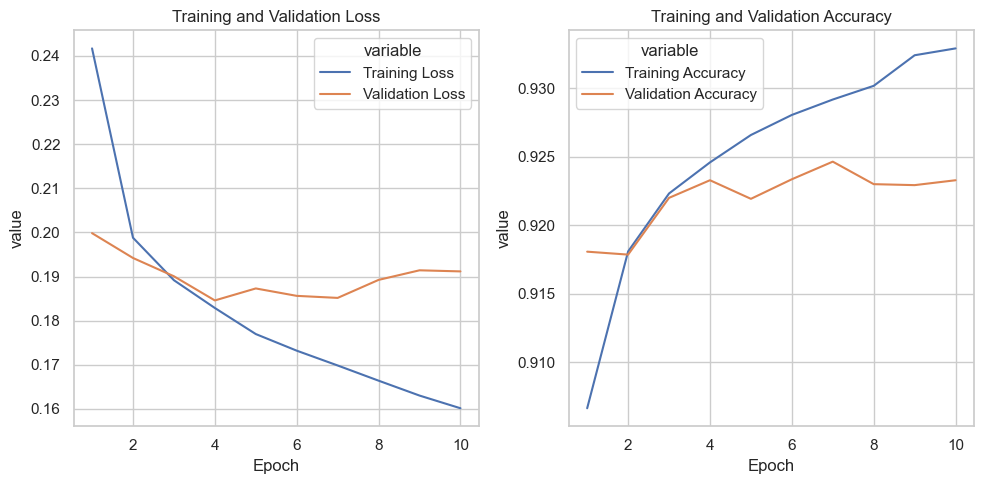

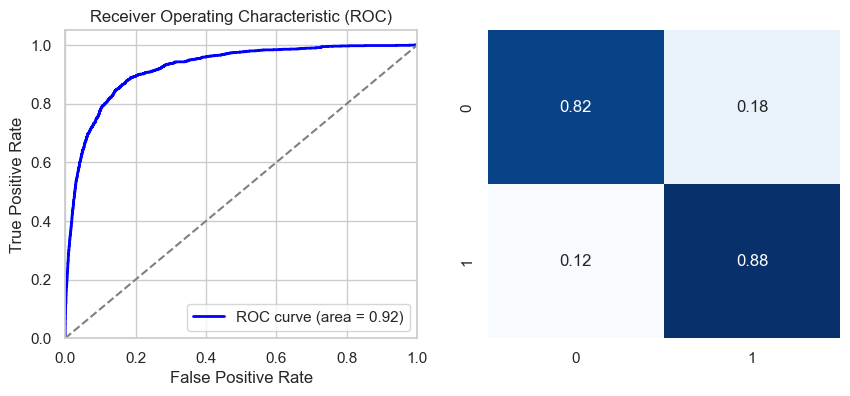

Accuracy Score:
 0.8302142857142857

Recall Score:
 0.8790436005625879

Precision Score:
 0.361794500723589

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.90     12578
           1       0.36      0.88      0.51      1422

    accuracy                           0.83     14000
   macro avg       0.67      0.85      0.70     14000
weighted avg       0.92      0.83      0.86     14000


Sensitivity: 	0.88
Specificity: 	0.82


Confusion Matrix:
 [[10373  2205]
 [  172  1250]]



In [23]:
model1 = train_model(model, epochs=10, batch_size=32)

### Model-2 : Same Model-1 with more epochs and Early Stopping

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9337 - loss: 0.1546 - val_accuracy: 0.9237 - val_loss: 0.1894
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9369 - loss: 0.1510 - val_accuracy: 0.9250 - val_loss: 0.1911
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9369 - loss: 0.1517 - val_accuracy: 0.9236 - val_loss: 0.1917
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9414 - loss: 0.1410 - val_accuracy: 0.9215 - val_loss: 0.1947
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9409 - loss: 0.1415 - val_accuracy: 0.9224 - val_loss: 0.1940
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9415 - loss: 0.1414 - val_accuracy: 0.9211 - val_loss: 0.2060
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9425 - loss: 0.1418 - val_accuracy: 0.9174 - val_loss: 0.2057
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9417 - loss: 

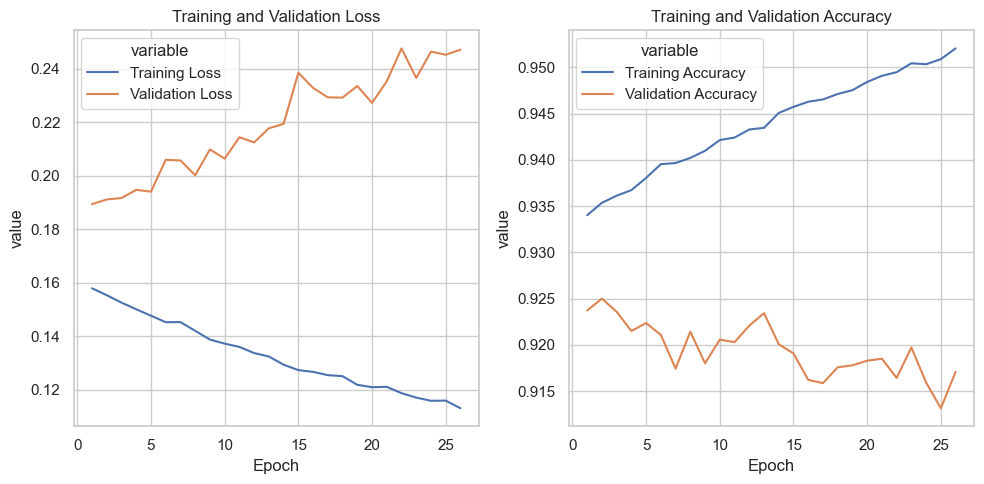

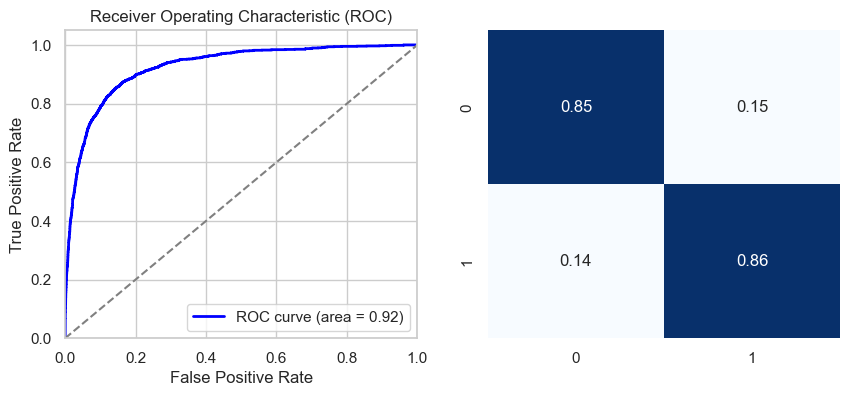

Accuracy Score:
 0.8540714285714286

Recall Score:
 0.8565400843881856

Precision Score:
 0.39842983316977426

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91     12578
           1       0.40      0.86      0.54      1422

    accuracy                           0.85     14000
   macro avg       0.69      0.86      0.73     14000
weighted avg       0.92      0.85      0.88     14000


Sensitivity: 	0.86
Specificity: 	0.85


Confusion Matrix:
 [[10739  1839]
 [  204  1218]]



In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min',min_delta=0.001, verbose=1, patience=25,restore_best_weights=True)

model2 = train_model(model, epochs=100, batch_size=32, callbacks=[early_stop])

### Model-3 with Dropouts & Early Stopping

In [27]:
model = Sequential()

model.add(Input(shape=(70,)))
model.add(Dense(70, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(9, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 70)                  │           4,970 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 40)                  │           2,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 25)                  │           1,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 9)                   │             234 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 5)                   │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,125 (35.64 KB)

 Trainable params: 9,125 (35.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8914 - loss: 0.3513 - val_accuracy: 0.8984 - val_loss: 0.2188
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8964 - loss: 0.2424 - val_accuracy: 0.8984 - val_loss: 0.2086
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8996 - loss: 0.2256 - val_accuracy: 0.8984 - val_loss: 0.2074
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8993 - loss: 0.2206 - val_accuracy: 0.8984 - val_loss: 0.2042
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8991 - loss: 0.2178 - val_accuracy: 0.8984 - val_loss: 0.2034
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8972 - loss: 0.2149 - val_accuracy: 0.8984 - val_loss: 0.1978
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8990 - loss: 0.2136 - val_accuracy: 0.8984 - val_loss: 0.2042
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8984 - loss: 0.2093 -

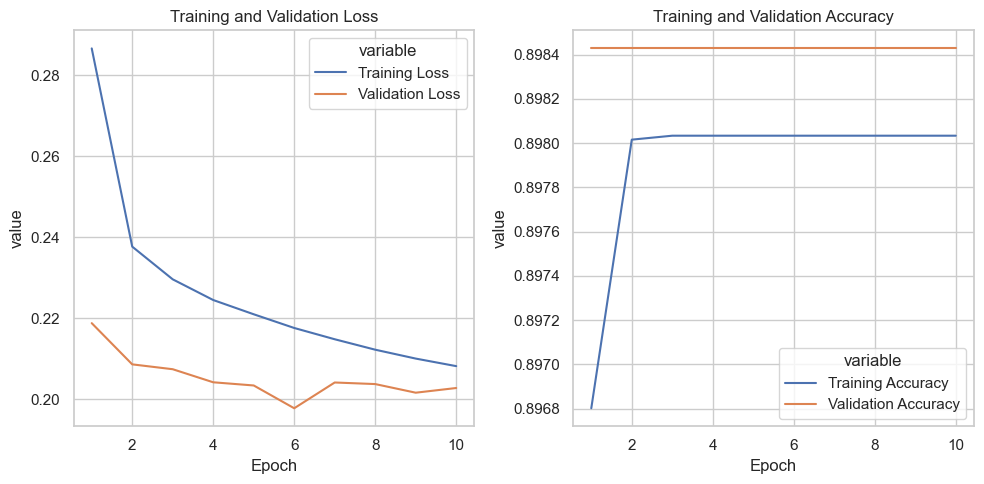

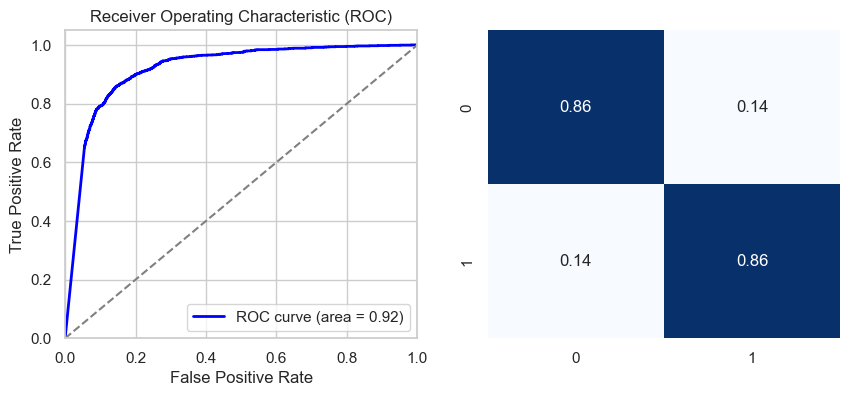

Accuracy Score:
 0.8562142857142857

Recall Score:
 0.8579465541490858

Precision Score:
 0.4025074232926427

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.91     12578
           1       0.40      0.86      0.55      1422

    accuracy                           0.86     14000
   macro avg       0.69      0.86      0.73     14000
weighted avg       0.92      0.86      0.88     14000


Sensitivity: 	0.86
Specificity: 	0.86


Confusion Matrix:
 [[10767  1811]
 [  202  1220]]



In [28]:
model3 = train_model(model, epochs=10, batch_size=32)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8983 - loss: 0.2065 - val_accuracy: 0.8984 - val_loss: 0.2054
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9000 - loss: 0.2008 - val_accuracy: 0.8984 - val_loss: 0.2034
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8976 - loss: 0.2020 - val_accuracy: 0.8984 - val_loss: 0.2077
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8978 - loss: 0.1967 - val_accuracy: 0.8984 - val_loss: 0.2056
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8995 - loss: 0.1961 - val_accuracy: 0.8984 - val_loss: 0.2101
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8988 - loss: 0.1939 - val_accuracy: 0.8984 - val_loss: 0.2047
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8976 - loss: 0.1967 - val_accuracy: 0.8984 - val_loss: 0.2122
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8965 - lo

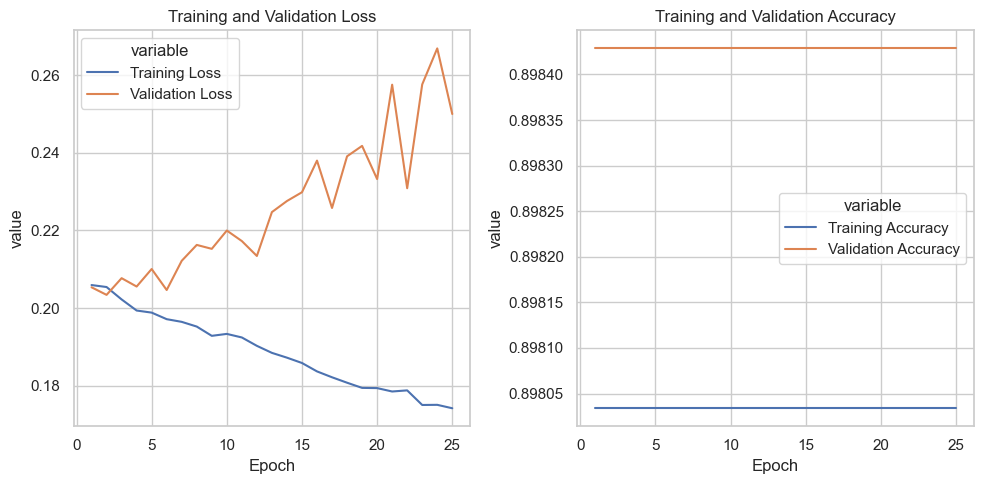

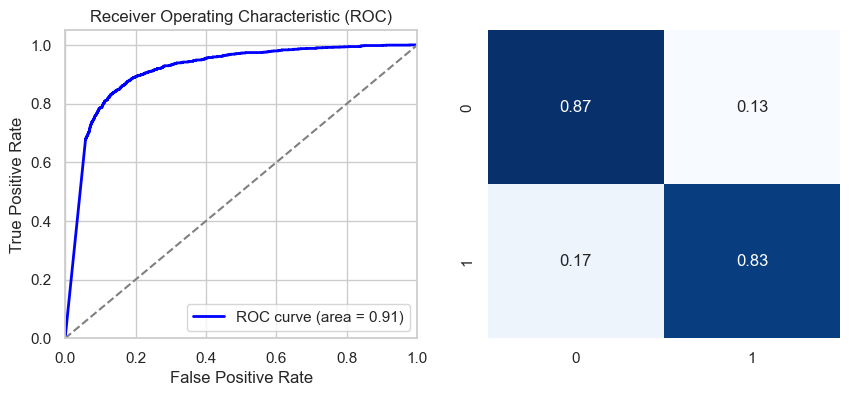

Accuracy Score:
 0.8664285714285714

Recall Score:
 0.8312236286919831

Precision Score:
 0.42034139402560455

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92     12578
           1       0.42      0.83      0.56      1422

    accuracy                           0.87     14000
   macro avg       0.70      0.85      0.74     14000
weighted avg       0.92      0.87      0.88     14000


Sensitivity: 	0.83
Specificity: 	0.87


Confusion Matrix:
 [[10948  1630]
 [  240  1182]]



In [29]:
model3 = train_model(model, epochs=100, batch_size=32, callbacks=[early_stop])

In [30]:
y_test.value_counts()

churn_probability
0    12578
1     1422
Name: count, dtype: int64

### Model-4 with less Hidden Layer and Dropouts

In [32]:
model = Sequential()

model.add(Input(shape=(70,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 50)                  │           3,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 9)                   │             153 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 9)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,529 (17.69 KB)

 Trainable params: 4,529 (17.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8885 - loss: 0.3444 - val_accuracy: 0.8986 - val_loss: 0.2242
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9009 - loss: 0.2434 - val_accuracy: 0.9129 - val_loss: 0.2139
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9081 - loss: 0.2300 - val_accuracy: 0.9128 - val_loss: 0.2021
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9082 - loss: 0.2189 - val_accuracy: 0.9159 - val_loss: 0.2005
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9128 - loss: 0.2105 - val_accuracy: 0.9211 - val_loss: 0.1941
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9101 - loss: 0.2143 - val_accuracy: 0.9210 - val_loss: 0.1940
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9128 - loss: 0.2058 - val_accuracy: 0.9220 - val_loss: 0.1924
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9146 - loss: 0

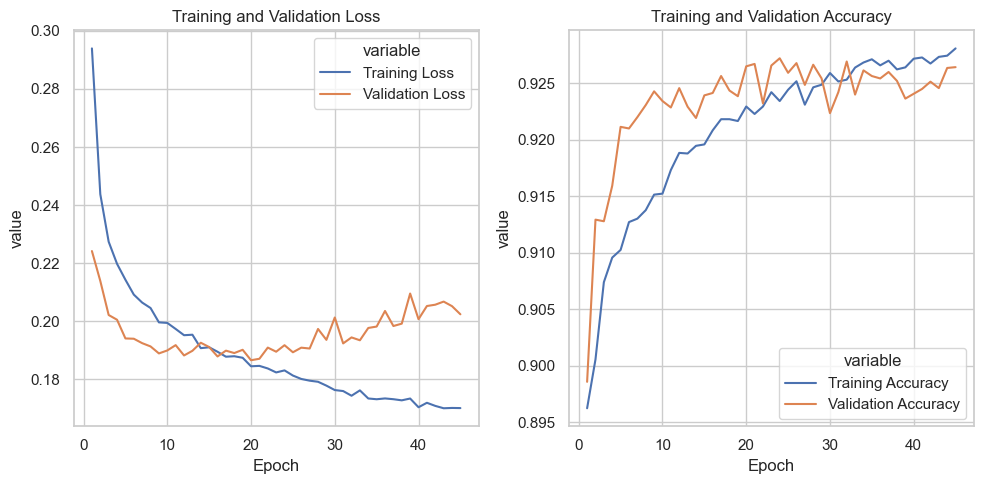

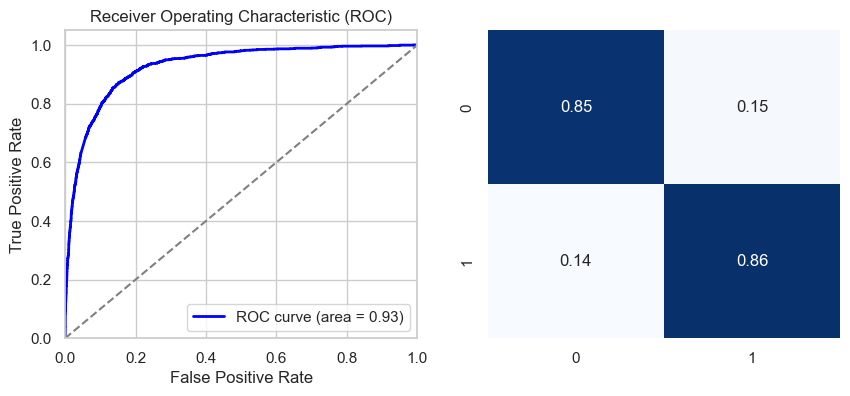

Accuracy Score:
 0.8557142857142858

Recall Score:
 0.8649789029535865

Precision Score:
 0.4022236756049706

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91     12578
           1       0.40      0.86      0.55      1422

    accuracy                           0.86     14000
   macro avg       0.69      0.86      0.73     14000
weighted avg       0.92      0.86      0.88     14000


Sensitivity: 	0.86
Specificity: 	0.85


Confusion Matrix:
 [[10750  1828]
 [  192  1230]]



In [33]:
model4 = train_model(model, batch_size=32, epochs=100, callbacks=[early_stop])

### Model-5 Regularization

In [35]:

from tensorflow.keras import regularizers
model = Sequential()

model.add(Input(shape=(70,)))
model.add(Dense(70, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(25, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(9, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 70)                  │           4,970 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 40)                  │           2,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 25)                  │           1,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 9)                   │             234 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 5)                   │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,125 (35.64 KB)

 Trainable params: 9,125 (35.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8634 - loss: 0.7884 - val_accuracy: 0.8984 - val_loss: 0.2987
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8987 - loss: 0.2964 - val_accuracy: 0.8984 - val_loss: 0.2868
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8984 - loss: 0.2902 - val_accuracy: 0.8984 - val_loss: 0.2805
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9017 - loss: 0.2850 - val_accuracy: 0.9062 - val_loss: 0.2782
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9015 - loss: 0.2838 - val_accuracy: 0.9022 - val_loss: 0.2744
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9059 - loss: 0.2749 - val_accuracy: 0.9054 - val_loss: 0.2737
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9047 - loss: 0.2763 - val_accuracy: 0.9044 - val_loss: 0.2686
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9071 - loss: 0.26

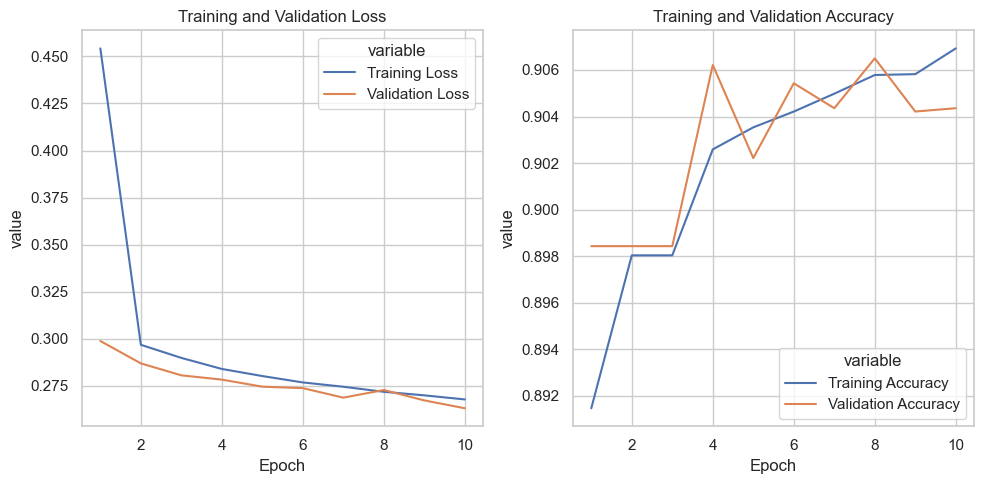

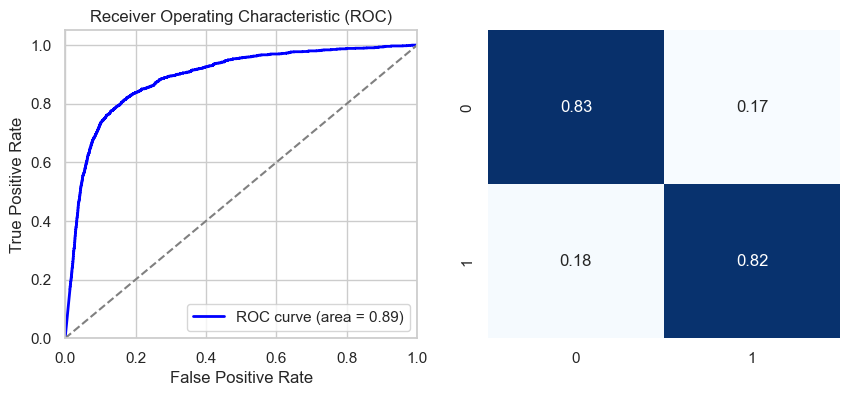

Accuracy Score:
 0.8247857142857142

Recall Score:
 0.819971870604782

Precision Score:
 0.34671424323520666

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.89     12578
           1       0.35      0.82      0.49      1422

    accuracy                           0.82     14000
   macro avg       0.66      0.82      0.69     14000
weighted avg       0.91      0.82      0.85     14000


Sensitivity: 	0.82
Specificity: 	0.83


Confusion Matrix:
 [[10381  2197]
 [  256  1166]]



In [36]:
model5 = train_model(model, epochs=10)

### Model-6 Dropout & Batch Normalization

In [38]:
model = Sequential()

model.add(Input(shape=(70,)))
model.add(Dense(70, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(40, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(25, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(9, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(5, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 70)                  │           4,970 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 70)                  │             280 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 40)                  │           2,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 40)                  │             160 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 25)                  │           1,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 25)                  │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 9)                   │             234 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 9)                   │              36 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 5)                   │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 5)                   │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,721 (37.97 KB)

 Trainable params: 9,423 (36.81 KB)

 Non-trainable params: 298 (1.16 KB)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8161 - loss: 0.4750 - val_accuracy: 0.9014 - val_loss: 0.2289
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8998 - loss: 0.2438 - val_accuracy: 0.9034 - val_loss: 0.2143
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9065 - loss: 0.2295 - val_accuracy: 0.9035 - val_loss: 0.2093
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9056 - loss: 0.2235 - val_accuracy: 0.9016 - val_loss: 0.2121
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9098 - loss: 0.2099 - val_accuracy: 0.9079 - val_loss: 0.2163
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9094 - loss: 0.2128 - val_accuracy: 0.9073 - val_loss: 0.2018
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9111 - loss: 0.2073 - val_accuracy: 0.9118 - val_loss: 0.1993
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9141 - 

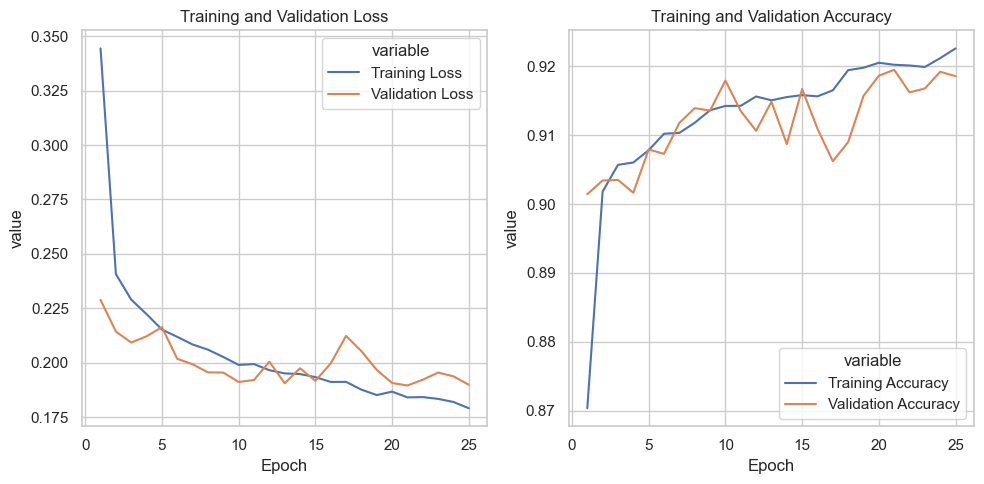

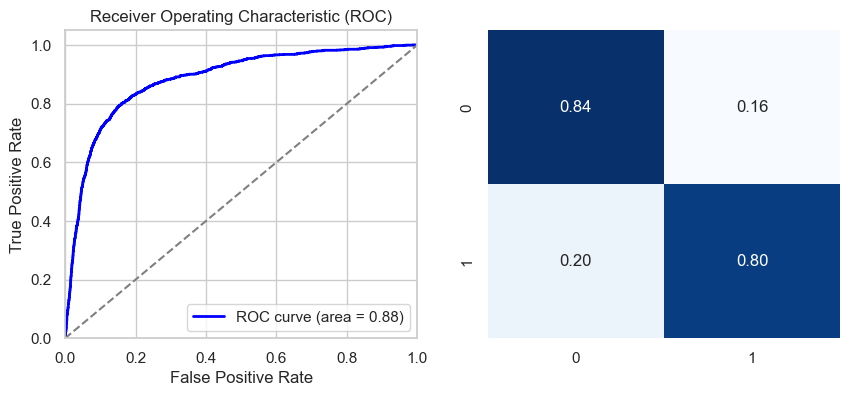

Accuracy Score:
 0.8357857142857142

Recall Score:
 0.8002812939521801

Precision Score:
 0.36092610212496035

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     12578
           1       0.36      0.80      0.50      1422

    accuracy                           0.84     14000
   macro avg       0.67      0.82      0.70     14000
weighted avg       0.91      0.84      0.86     14000


Sensitivity: 	0.8
Specificity: 	0.84


Confusion Matrix:
 [[10563  2015]
 [  284  1138]]



In [39]:
model6 = train_model(model, epochs=100, batch_size=32, callbacks=[early_stop])